## Intro to statistical analysis of neural data in *Python* ##

### Part 1: Frequency tables, distributions, and scatter plots ###

Welcome to this hands-on lesson where we'll explore teh basics of statistical analysis! We'll be working with a dataset of 25,000 18-year-olds that includes their height (in inches) and weight (in pounds). Even though this isn't neural data, we can use this dataset to learn about statistical concepts that apply to any type of data, including data about the brain!
<br>
By the end of this lesson, you will: 
<br>

- Load and inspect tabular data from a CSV file.
- Create and interpret frequency tables.
- Visualize data using histograms and scatter plots.
- Understand how your choice of the number of bins affects the shape of a histogram.

<br>
Lets get started!

#### **📦 Import necessary libraries**

As always, let's start by importing the critical Python libraries that we'll be using to do 
- math
- manipulate data
- generate plots

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

##### **📂 Step 1: Load the Dataset**

We will beign by importing the dataset from a CSV file called `height_weight.csv`. Make sure this file is in the same directory as your notebook.
<br>
To start, let's import the data and inspect how many rows and columns there are in our data. 

In [4]:
# Load the dataset
df = pd.read_csv("csv files/HeightWeight.csv")

# Display the shape to see how many rows and columns we have 
print(f"Dataset shape: {df.shape}")

Dataset shape: (1000, 3)


❓What do you think the number of rows and columns correspond to?

##### **👀 Step 2: View the First 20 Rows**

Let's take a quick look at the first few entries in the dataset to get a feel for the data.

In [4]:
# Display the first 20 rows
df.head(20)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


We can see from the output that the data seems reasonable (remember that these are values of the height and weight of 18 year old humans)

##### 📊 Step 3: Create a Frequency Table

Our first step in getting a sense of the distribution is to generate a frequency table. We'll now create a frequency table for height by grouping the values into bins.
<br><br>
First, we will define the bin edges manually. To start, let's create bins that are 10 inches wide, starting at 50 inches (about 4.5 feet) and ending at 90 inches (over 7 feet). 
<br><br>
❓How many bins do you think this will create?

In [5]:
# Define bin edges for height (in cm)
bin_edges = [50, 60, 70, 80, 90] 

# Use pandas 'cut' function to group data
height_bins = pd.cut(df['Height(Inches)'], bins=bin_edges) 

# Create frequency table
height_freq_table = height_bins.value_counts().sort_index()

# Display the frequency table
height_freq_table

Height(Inches)
(50, 60]      0
(60, 70]    835
(70, 80]    165
(80, 90]      0
Name: count, dtype: int64

##### **📉 Step 4: Plot a Histogram**

We'll now visualize the distribution of height using a histogram. As you've learnt, a histogram helps us understand the shape and spread of the sample of data.

**Task:** In the cell below, let's add labels for the x and y axis, and give the figure a title

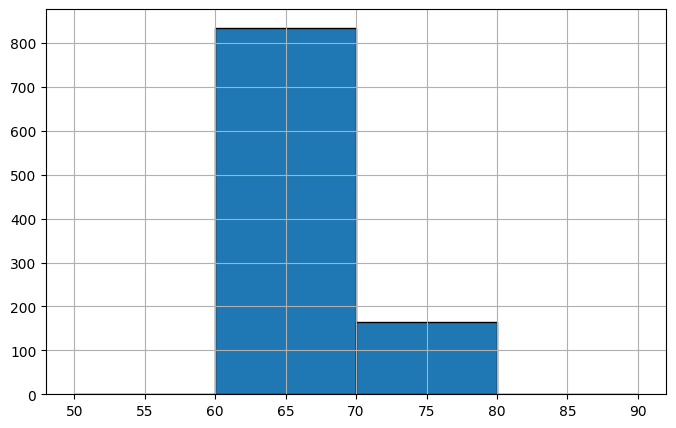

In [6]:
# Plot histogram for height
plt.figure(figsize=(8, 5)) 
plt.hist(df['Height(Inches)'], bins=bin_edges, edgecolor = 'black')

# insert axis labels and title here


plt.grid(True)
plt.show()

##### **🔧 Step 5: Vary the Number of Bins**

Above, we used bins that were spaced in 10-inch increments.

**Questions❓** 
- Do you think this reveals enough detail about the distribution of height? 
- What could we change to reveal more about the shape of the distribution? 

<br>
Let's see how changing the number of bins affects the appearance of a histogram. But rather than specifying the bin-edges manually as we did before, let's just tell Python how many bins we want, and it will automatically create bin-edges that are evenly spaced across the rang eof the data.

In [ ]:
# Define number of bins
num_bins = 5
bins = pd.cut(df['Height'], bins=num_bins)

# For comparison sake let's print out what the frequency table will look like!
freq_table = bins.value_counts().sort_index()
freq_table

Height(Inches)
(62.005, 64.394]     28
(64.394, 66.77]     238
(66.77, 69.147]     447
(69.147, 71.524]    252
(71.524, 73.901]     35
Name: count, dtype: int64

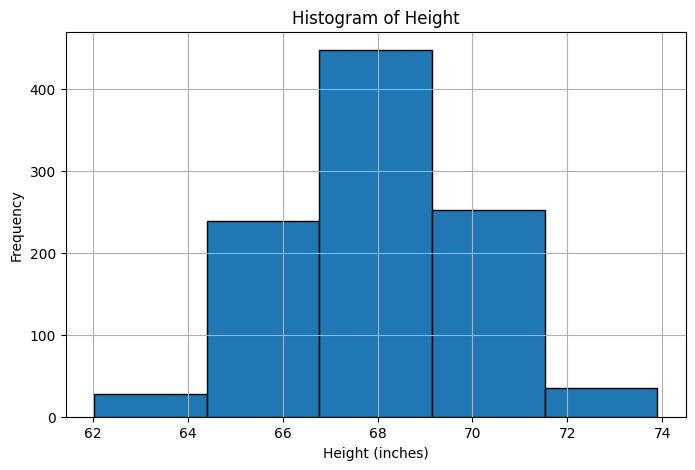

In [ ]:
# Plot histogram for height 
plt.figure(figsize=(8, 5)) 
plt.hist(df['Height'], bins=num_bins, edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Task:**  Keep running the cell below, but each time, try entering different values in 'num_bins', such as 5, 10, 20, 50, and 200.

**Questions❓** 
- How did the number of bins (and therefore the bin size) affect the shape of the distribution that is plotted?

Let's not forget that for each of the 1,000 humans in our dataset, we have values for both their height *and* their weight!
<br><br>
First, let's plot a histogram to view the distribution of weight. We'll have Python automatically create 50 bins.
<br>

**Visualizing both height and weight**

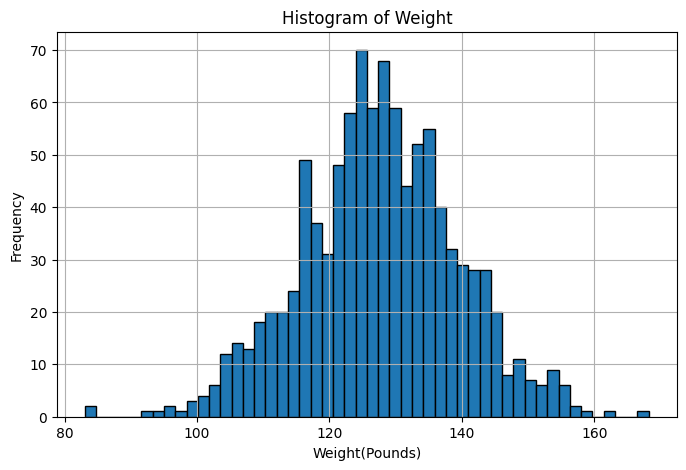

In [ ]:
# Plot histogram for weight using default bins
plt.figure(figsize=(8, 5))
plt.hist(df['Weight'], bins=50, edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Questions❓** 
- Does the distribution of weight look similar in shape to the distribution for height? 

##### ⚖️ Step 6: Scatter Plot of Height vs. Weight

So far, we've only visualized the distribution for either height OR weight, one at a time. But it is often useful to visualize more than one variable at a time.
<br><br>

Let's visualize both height, and weight simultaneously using a *scatter plot*.
<br>
As you just learnt in lecture, scatter plots are a useful way to simultaneously visualize two variables.
<br><br>

Instead of "binning" the data to create discrete bins as we did for generating a histogram, the data remains *continuous* for plotting scatter plots.

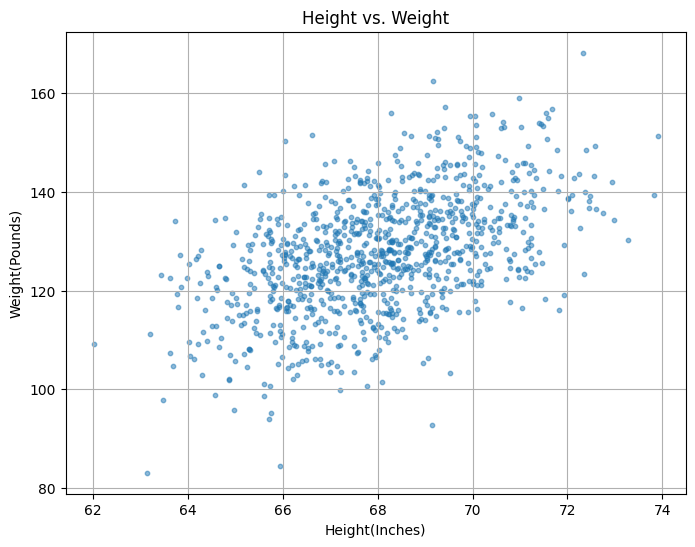

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], alpha=0.5, s=10)
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

**Questions❓**
- What does each marker (i.e., each dot) represent in the scatterplot?
- Additionally, what do you notice about the relationship between people's height and weight? Is there a pattern across the data? This will be a relevant concept we will touch upon later this semester!

##### ✅ Summary

In this lesson, you learned how to: 
- Load and view data using pandas.
- Create frequency tables using custom bin edges.
- Visualize distributions with histograms.
- Understand the effect of bin size on histograms.
- Use scatter plots to explore relationships between two variables.

Some of the next steps we'll tackle include computing summary statistics of a distribution (mean, median, standard deviation), and identifying outliers.
<br><br>

**🎉 Great job!**